In [1]:
### Titanic Dataset

In [22]:
# Import the libraries 
import numpy as np
import pandas as pd

In [23]:
# Read the Data 
df = pd.read_csv('titanic.csv')

In [24]:
# View first few rows of data 
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [26]:
# understand shape and size of data 
print(df.shape)
print(df.size)

(891, 12)
10692


In [27]:
# get numerical overview of numerical type columns (MILES)
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# check info about data (includes column names, the number of non-null values in it, and data-type for each column.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
### The coloumn of Age,Cabin & Embarked have null values

In [30]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [31]:
df["Age"].count()

714

In [32]:
df["Cabin"].count()

204

In [33]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [34]:
### The column of Embarked has only two null values, so drop these rows.
df.drop([61,829], inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [36]:
df.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
### The null values in age column will be replaced by mean


In [40]:
x = df["Age"].mean()
df["Age"].fillna(x, inplace= True)

In [44]:
### The column of Cabin has higher null values. so eliminating the column of cabin from dataset
df.dropna(inplace = True)

In [52]:
print(df.isnull().sum(axis = 0))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [ ]:
### Now the dataset has no null values. 

In [56]:
# Use groupby to get aggregated description of fare for survived and non survived passengers below two methods
df["Survived"].value_counts()

1    134
0     68
Name: Survived, dtype: int64

In [57]:
%matplotlib inline 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [59]:
plt.style.use('seaborn-bright')

<AxesSubplot:ylabel='Survived'>

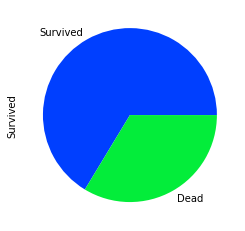

In [67]:
df["Survived"].value_counts().plot.pie(labels = ['Survived','Dead'])

<AxesSubplot:>

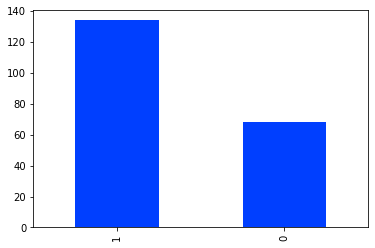

In [68]:
df["Survived"].value_counts().plot(kind = "bar")

In [71]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,6,89
male,62,45


In [72]:
df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            6
        1           89
male    0           62
        1           45
Name: Survived, dtype: int64

In [83]:
df.groupby(["Pclass","Survived"])["Survived"].count()

Pclass  Survived
1       0            59
        1           115
2       0             3
        1            13
3       0             6
        1             6
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Pclass'>

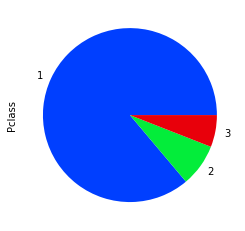

In [85]:
df["Pclass"].value_counts().plot.pie()

In [ ]:
# Age 
- null values
- mean, median, std 
- Age Vs Survived 

In [87]:
df[['Age']].describe()

,Age
count,202.000000
mean,35.107029
std,14.990431
min,0.920000
25%,25.000000
50%,33.500000
75%,46.750000
max,80.000000


In [88]:
df.groupby(["Survived"])["Age"].mean()

Survived
0    39.972599
1    32.637933
Name: Age, dtype: float64

In [89]:
df.groupby(["Sex"])["Age"].mean()

Sex
female    32.452575
male      37.463786
Name: Age, dtype: float64

In [90]:
df.groupby(["Pclass"])["Age"].mean()

Pclass
1    36.860307
2    25.540131
3    22.440349
Name: Age, dtype: float64

C:\Users\aradh.AJ-LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

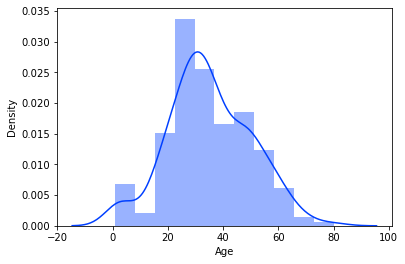

In [92]:
sns.distplot(df.Age, hist = True )